<a href="https://colab.research.google.com/github/SurekhaBerlin/Python/blob/main/logisticsdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case 2: Logistics**


## DATA PREPARATION

1. Seperating each excel sheet to a seperate csv files named orders.csv , sales.csv , customers.csv, city.csv

In [1]:
import pandas as pd

# Load the Excel file
excel_file = '/content/logiticsdataset.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)  # Use the variable holding the file path

# Read all sheets, adjust the names of sheets as per your Excel file
df1 = pd.read_excel(xls, 'Orders')

# Concatenate all dataframes
df_concat = pd.concat([df1], ignore_index=True)  # Added ignore_index=True for a clean index

# Write to CSV file
df_concat.to_csv('orders.csv', index=False)

In [2]:
import pandas as pd

# Load the Excel file
excel_file = '/content/logiticsdataset.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)  # Use the variable holding the file path

# Read all sheets, adjust the names of sheets as per your Excel file

df2 = pd.read_excel(xls, 'Salesperson')

# Concatenate all dataframes
df_concat = pd.concat([df2], ignore_index=True)  # Added ignore_index=True for a clean index

# Write to CSV file
df_concat.to_csv('sales.csv', index=False)

In [3]:
import pandas as pd

# Load the Excel file
excel_file = '/content/logiticsdataset.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)  # Use the variable holding the file path

# Read sheet name Customer, adjust the name of sheet as per your Excel file

df3 = pd.read_excel(xls, 'Customer')


# Concatenate all dataframes
df_concat = pd.concat([df3], ignore_index=True)  # Added ignore_index=True for a clean index

# Write to CSV file
df_concat.to_csv('customers.csv', index=False)

In [4]:
import pandas as pd

# Load the Excel file
excel_file = '/content/logiticsdataset.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)  # Use the variable holding the file path

# Read all sheets, adjust the names of sheets as per your Excel file

df4 = pd.read_excel(xls, 'City')

# Concatenate all dataframes
df_concat = pd.concat([df4], ignore_index=True)  # Added ignore_index=True for a clean index

# Write to CSV file
df_concat.to_csv('city.csv', index=False)

In [5]:
# Importing all required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [6]:
# Reading the data
## import telecom dataset into a pandas data frame

orders = pd.read_csv("/content/orders.csv")

In [7]:
orders.columns.values

array(['OrderDate', 'OrderID', 'ScheduledDeliveryDate', 'e-BL_IssuedDate',
       'ActualDeliveryDate', 'SalespersonID', 'CustomerID', 'Returns'],
      dtype=object)

In [8]:
# Check the descriptive statistics of numeric variables
orders.describe()

,OrderID,SalespersonID,CustomerID,Returns
count,2.433430e+05,243343.000000,243343.000000,243343.000000
mean,5.594759e+06,3157.619101,124991.963163,0.150964
std,1.020853e+05,1269.336641,45149.479762,2.346439
min,5.415486e+06,1.000000,2.000000,0.000000
25%,5.504324e+06,3459.000000,80510.000000,0.000000
50%,5.598457e+06,3772.000000,138256.000000,0.000000
75%,5.681206e+06,3875.000000,168525.500000,0.000000
max,5.769265e+06,5003.000000,177221.000000,51.000000


In [9]:
# Data Wrangling
orders.head()

,OrderDate,OrderID,ScheduledDeliveryDate,e-BL_IssuedDate,ActualDeliveryDate,SalespersonID,CustomerID,Returns
0,2020-08-07,5764070,2020-08-11,2020-08-11,NaN,3825,177170,0
1,2020-08-07,5764069,2020-08-11,2020-08-11,NaN,3825,177170,0
2,2020-08-11,5765934,2020-08-15,2020-08-17,NaN,839,174918,0
3,2020-08-11,5765935,2020-08-15,2020-08-17,NaN,839,174918,0
4,2020-08-12,5766151,2020-08-16,2020-08-17,NaN,3522,50735,0


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243343 entries, 0 to 243342
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   OrderDate              243343 non-null  object
 1   OrderID                243343 non-null  int64 
 2   ScheduledDeliveryDate  243341 non-null  object
 3   e-BL_IssuedDate        243343 non-null  object
 4   ActualDeliveryDate     242269 non-null  object
 5   SalespersonID          243343 non-null  int64 
 6   CustomerID             243343 non-null  int64 
 7   Returns                243343 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 14.9+ MB


In [11]:
#Changing the datatype
orders.OrderDate  = pd.to_datetime(orders.OrderDate ,errors= 'coerce')
orders.ScheduledDeliveryDate  = pd.to_datetime(orders.ScheduledDeliveryDate ,errors= 'coerce')
orders. ActualDeliveryDate    = pd.to_datetime(orders. ActualDeliveryDate    ,errors= 'coerce')


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243343 entries, 0 to 243342
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OrderDate              243343 non-null  datetime64[ns]
 1   OrderID                243343 non-null  int64         
 2   ScheduledDeliveryDate  243341 non-null  datetime64[ns]
 3   e-BL_IssuedDate        243343 non-null  object        
 4   ActualDeliveryDate     242269 non-null  datetime64[ns]
 5   SalespersonID          243343 non-null  int64         
 6   CustomerID             243343 non-null  int64         
 7   Returns                243343 non-null  int64         
dtypes: datetime64[ns](3), int64(4), object(1)
memory usage: 14.9+ MB


In [13]:
orders.dtypes

OrderDate                datetime64[ns]
OrderID                           int64
ScheduledDeliveryDate    datetime64[ns]
e-BL_IssuedDate                  object
ActualDeliveryDate       datetime64[ns]
SalespersonID                     int64
CustomerID                        int64
Returns                           int64
dtype: object

In [14]:
orders.isnull().sum()

OrderDate                   0
OrderID                     0
ScheduledDeliveryDate       2
e-BL_IssuedDate             0
ActualDeliveryDate       1074
SalespersonID               0
CustomerID                  0
Returns                     0
dtype: int64

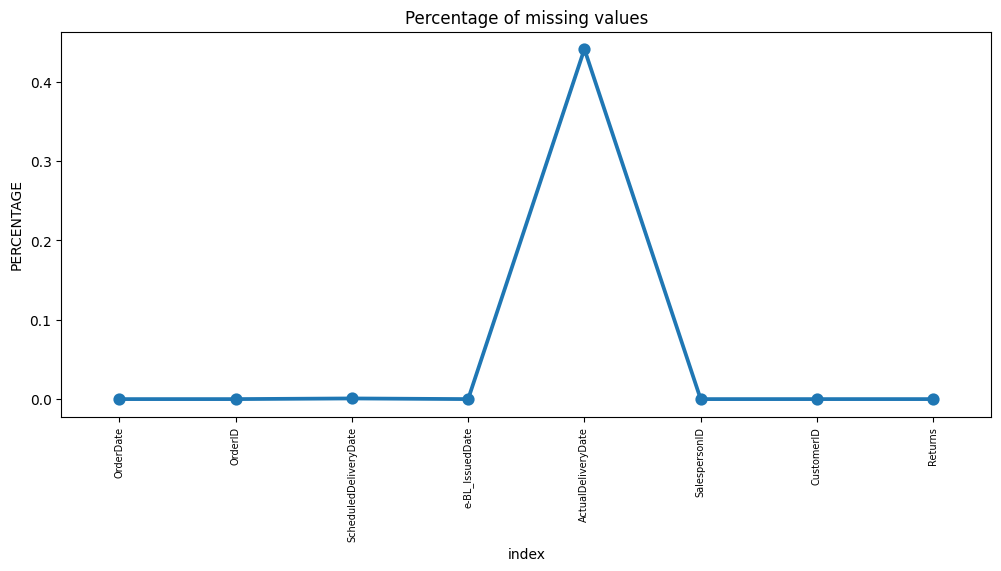

In [15]:
# Using a plot to show the percentage of missing values

missing = pd.DataFrame((orders.isnull().sum())*100/orders.shape[0]).reset_index()
plt.figure(figsize = (12,5))
ax = sns.pointplot(x = 'index', y = 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [16]:
sales = pd.read_csv("/content/sales.csv")

In [17]:
sales.columns.values

array(['SalespersonID', 'Salesperson', 'Team'], dtype=object)

In [18]:
sales.describe()

,SalespersonID
count,109.000000
mean,3163.779817
std,1354.917432
min,1.000000
25%,3346.000000
50%,3781.000000
75%,3924.000000
max,5003.000000


In [19]:
sales.head()


,SalespersonID,Salesperson,Team
0,3405,ITP,COAST
1,3630,GSP,COAST
2,3875,ITP-CEN,VALLEY
3,3523,BCA-CMB,COAST
4,3846,ICR,SOUTH


In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalespersonID  109 non-null    int64 
 1   Salesperson    109 non-null    object
 2   Team           109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [21]:
sales.dtypes

SalespersonID     int64
Salesperson      object
Team             object
dtype: object

In [22]:
sales.isnull().sum()

SalespersonID    0
Salesperson      0
Team             0
dtype: int64

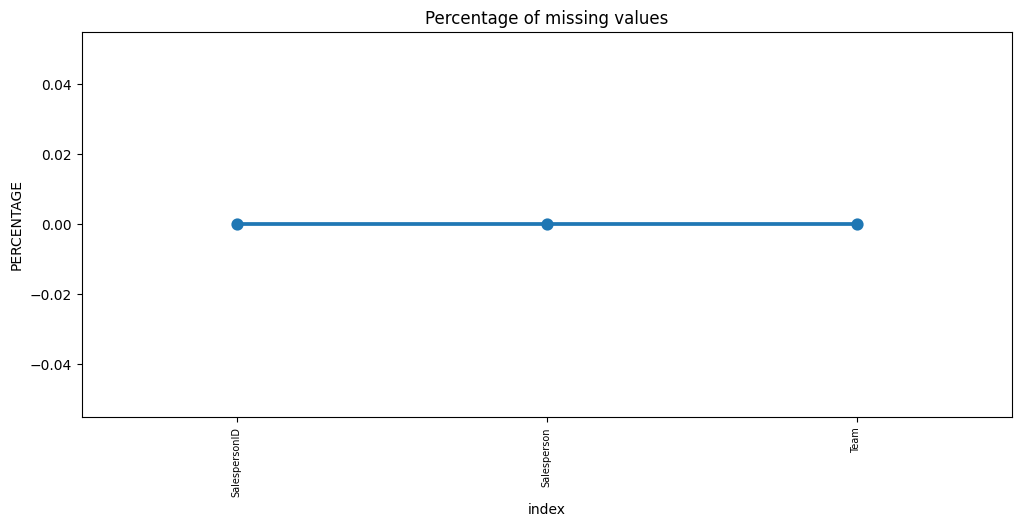

In [23]:
# Using a plot to show the percentage of missing values

missing = pd.DataFrame((sales.isnull().sum())*100/sales.shape[0]).reset_index()
plt.figure(figsize = (12,5))
ax = sns.pointplot(x = 'index', y = 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [24]:
customers= pd.read_csv("/content/customers.csv")

In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11632 entries, 0 to 11631
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      11632 non-null  int64  
 1   Customer        11632 non-null  object 
 2   ServiceChannel  11632 non-null  object 
 3   CityID          11621 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 363.6+ KB


In [26]:
customers.isnull().sum()

CustomerID         0
Customer           0
ServiceChannel     0
CityID            11
dtype: int64

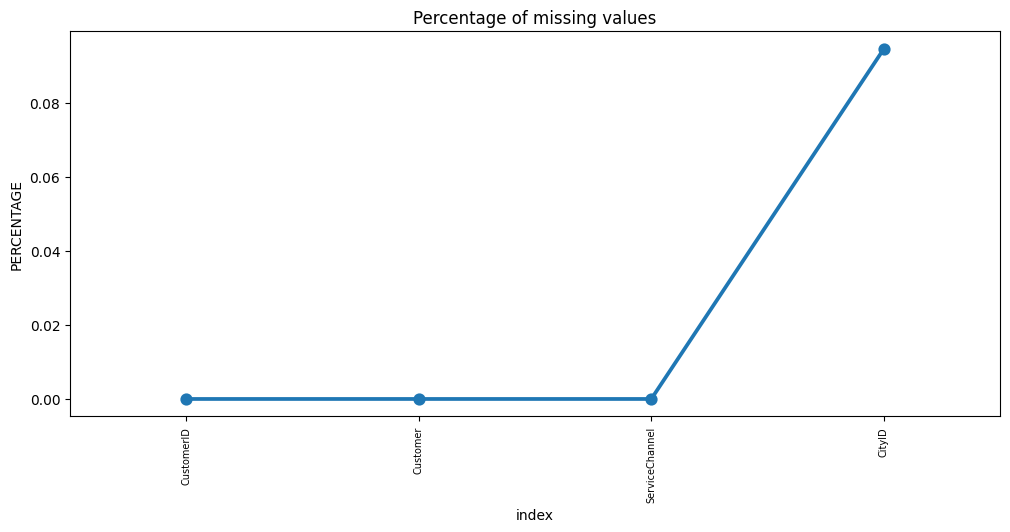

In [27]:
# Using a plot to show the percentage of missing values

missing = pd.DataFrame((customers.isnull().sum())*100/customers.shape[0]).reset_index()
plt.figure(figsize = (12,5))
ax = sns.pointplot(x = 'index', y = 0,data = missing)
plt.xticks(rotation = 90 , fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()


In [28]:
city = pd.read_csv("/content/city.csv")

In [29]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  168 non-null    int64 
 1   City    168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [30]:
city.isnull().sum()

CityID    0
City      0
dtype: int64

## DATA CLEANING
Handling Missing Value

In [31]:
orders.isnull().sum()

OrderDate                   0
OrderID                     0
ScheduledDeliveryDate       2
e-BL_IssuedDate             0
ActualDeliveryDate       1074
SalespersonID               0
CustomerID                  0
Returns                     0
dtype: int64

In [32]:
sales.isnull().sum()

SalespersonID    0
Salesperson      0
Team             0
dtype: int64

In [33]:
customers.isnull().sum()

CustomerID         0
Customer           0
ServiceChannel     0
CityID            11
dtype: int64

In [34]:
city.isnull().sum()

CityID    0
City      0
dtype: int64

Two datasets do not contain any missing values. So, there is no need to handle missing data imputation.The other 2 datasets orders and city has very few percentage of missing data which can be droped since its only a few values

 Missing Value Treatment

*   Since the percentage of these records compared to the total dataset is very low i.e. 0.4%  and 0.09% it is safe to ignore them or drop them from further processing
*   Incase you want to treat them, you can use mean() or median() to treat them  

In [35]:
#Removing null/missing values
orders.dropna(how = 'any', inplace = True)

In [36]:
#Removing null/missing values
customers.dropna(how = 'any', inplace = True)

In [37]:
orders.isnull().sum()

OrderDate                0
OrderID                  0
ScheduledDeliveryDate    0
e-BL_IssuedDate          0
ActualDeliveryDate       0
SalespersonID            0
CustomerID               0
Returns                  0
dtype: int64

In [38]:
customers.isnull().sum()

CustomerID        0
Customer          0
ServiceChannel    0
CityID            0
dtype: int64

## Duplicated Data

In [39]:
orders.duplicated().sum()

0

In [40]:
sales.duplicated().sum()

0

In [41]:
customers.duplicated().sum()

0

In [42]:
city.duplicated().sum()

0

Moreover, the absence of any duplicate values in all three datasets is also promising. This indicates that the data is fairly clean and ready for analysis.

## DATA WRANGLING
Leading and Trailing Space

In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242267 entries, 1074 to 243342
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OrderDate              242267 non-null  datetime64[ns]
 1   OrderID                242267 non-null  int64         
 2   ScheduledDeliveryDate  242267 non-null  datetime64[ns]
 3   e-BL_IssuedDate        242267 non-null  object        
 4   ActualDeliveryDate     242267 non-null  datetime64[ns]
 5   SalespersonID          242267 non-null  int64         
 6   CustomerID             242267 non-null  int64         
 7   Returns                242267 non-null  int64         
dtypes: datetime64[ns](3), int64(4), object(1)
memory usage: 16.6+ MB


In [44]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalespersonID  109 non-null    int64 
 1   Salesperson    109 non-null    object
 2   Team           109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [45]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11621 entries, 0 to 11631
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      11621 non-null  int64  
 1   Customer        11621 non-null  object 
 2   ServiceChannel  11621 non-null  object 
 3   CityID          11621 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 453.9+ KB


In [46]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CityID  168 non-null    int64 
 1   City    168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


After inspecting the data using .info(), it has come to our attention that there are anomalies present in the datasets. Specifically, we have discovered that some columns contain leading or trailing spaces, which are not intended to be part of the column names.

In [47]:
# using strip fn removing unwanted spaces from columns name
dataframes = [orders, sales, customers, city]

for df in dataframes:
  df.columns = df.columns.str.strip()

In [48]:
orders.columns

Index(['OrderDate', 'OrderID', 'ScheduledDeliveryDate', 'e-BL_IssuedDate',
       'ActualDeliveryDate', 'SalespersonID', 'CustomerID', 'Returns'],
      dtype='object')

In [49]:
sales.columns

Index(['SalespersonID', 'Salesperson', 'Team'], dtype='object')

In [50]:
customers.columns

Index(['CustomerID', 'Customer', 'ServiceChannel', 'CityID'], dtype='object')

In [51]:
city.columns

Index(['CityID', 'City'], dtype='object')

In [52]:
# check unique values of each column
for column in city:
    print('Column: {} - Unique Values: {}'.format(column, city[column].unique()))

Column: CityID - Unique Values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168]
Column: City - Unique Values: ['Boulder' 'Des Moines' 'Provo' 'Fontana' 'Gainesville' 'Garland'
 'Rockford' 'Naperville' 'Minneapolis' 'Elk Grove' 'Worcester' 'Renton'
 'Montgomery' 'Augusta' 'El Monte' 'Ventura' 'Baton Rouge' 'Atlanta'
 'Hayward' 'Glendale' 'Laredo' 'Boise' 'Greensbo

In [53]:
orders.head()

,OrderDate,OrderID,ScheduledDeliveryDate,e-BL_IssuedDate,ActualDeliveryDate,SalespersonID,CustomerID,Returns
1074,2020-08-11,5765105,2020-08-15,2020-08-12,2020-08-14,3802,142543,0
1075,2020-08-11,5765249,2020-08-15,2020-08-12,2020-08-14,3802,167323,0
1076,2020-08-11,5765612,2020-08-15,2020-08-12,2020-08-14,3802,175959,0
1077,2020-08-11,5765536,2020-08-15,2020-08-12,2020-08-14,3630,69705,0
1078,2020-08-11,5765027,2020-08-15,2020-08-12,2020-08-14,3630,170156,0


In [54]:
customers.head()

,CustomerID,Customer,ServiceChannel,CityID
0,2,Customer 10195,SM FROM 02 TO 04 CHECK-OUT,71.0
1,41,Customer 6117,INDUSTRY / COMPANY,79.0
2,51,Customer 1339,INDUSTRY / COMPANY,71.0
3,22436,Customer 5114,CONVENIENCE SHOP,71.0
4,22539,Customer 3335,THIRD PARTY,71.0


In [55]:
sales.head()

,SalespersonID,Salesperson,Team
0,3405,ITP,COAST
1,3630,GSP,COAST
2,3875,ITP-CEN,VALLEY
3,3523,BCA-CMB,COAST
4,3846,ICR,SOUTH


In [56]:
city.head()

,CityID,City
0,1,Boulder
1,2,Des Moines
2,3,Provo
3,4,Fontana
4,5,Gainesville


## FEATURE ENGINEERING :





Code will now extract the year, month, and day components for OrderDate, ScheduledDeliveryDate and ActualDeliveryDate

In [57]:
orders = pd.read_csv("/content/orders.csv")
# Convert date columns to datetime format
orders['ScheduledDeliveryDate'] = pd.to_datetime(orders['ScheduledDeliveryDate'])
orders['ActualDeliveryDate'] = pd.to_datetime(orders['ActualDeliveryDate'])
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

# Extract year, month, day, and time into separate columns for ScheduledDeliveryDate
orders['ScheduledDeliveryYear'] = orders['ScheduledDeliveryDate'].dt.year
orders['ScheduledDeliveryMonth'] = orders['ScheduledDeliveryDate'].dt.month
orders['ScheduledDeliveryDay'] = orders['ScheduledDeliveryDate'].dt.day

# Extract year, month, day, and time into separate columns for ActualDeliveryDate
orders['ActualDeliveryYear'] = orders['ActualDeliveryDate'].dt.year
orders['ActualDeliveryMonth'] = orders['ActualDeliveryDate'].dt.month
orders['ActualDeliveryDay'] = orders['ActualDeliveryDate'].dt.day

# Extract year, month, day, and time into separate columns for OrderDate
orders['OrderYear'] = orders['OrderDate'].dt.year
orders['OrderMonth'] = orders['OrderDate'].dt.month
orders['OrderDay'] = orders['OrderDate'].dt.day

orders.head()


,OrderDate,OrderID,ScheduledDeliveryDate,e-BL_IssuedDate,ActualDeliveryDate,SalespersonID,CustomerID,Returns,ScheduledDeliveryYear,ScheduledDeliveryMonth,ScheduledDeliveryDay,ActualDeliveryYear,ActualDeliveryMonth,ActualDeliveryDay,OrderYear,OrderMonth,OrderDay
0,2020-08-07,5764070,2020-08-11,2020-08-11,NaT,3825,177170,0,2020.0,8.0,11.0,NaN,NaN,NaN,2020,8,7
1,2020-08-07,5764069,2020-08-11,2020-08-11,NaT,3825,177170,0,2020.0,8.0,11.0,NaN,NaN,NaN,2020,8,7
2,2020-08-11,5765934,2020-08-15,2020-08-17,NaT,839,174918,0,2020.0,8.0,15.0,NaN,NaN,NaN,2020,8,11
3,2020-08-11,5765935,2020-08-15,2020-08-17,NaT,839,174918,0,2020.0,8.0,15.0,NaN,NaN,NaN,2020,8,11
4,2020-08-12,5766151,2020-08-16,2020-08-17,NaT,3522,50735,0,2020.0,8.0,16.0,NaN,NaN,NaN,2020,8,12


In [58]:
orders.count()

OrderDate                 243343
OrderID                   243343
ScheduledDeliveryDate     243341
e-BL_IssuedDate           243343
ActualDeliveryDate        242269
SalespersonID             243343
CustomerID                243343
Returns                   243343
ScheduledDeliveryYear     243341
ScheduledDeliveryMonth    243341
ScheduledDeliveryDay      243341
ActualDeliveryYear        242269
ActualDeliveryMonth       242269
ActualDeliveryDay         242269
OrderYear                 243343
OrderMonth                243343
OrderDay                  243343
dtype: int64

## DATA MANIPULATION



## DATA EXPORTING






## CONNECTING TO MY SQL


